# Questions

1. Determine or test the influence of different variables on the emission of CO2.
2. What are the most influencing features that affect the CO2 emission the most?
3. Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway are considered separately and when their weighted variable interaction is considered?

# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
print(df.shape)
df.head()

(7385, 12)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Missing Values

In [3]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## Numerical Features

In [4]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[num_features].head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


### Discrete features

In [5]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
print(discrete_features)

['Cylinders']


Cylinders
3     0.012864
4     0.436019
5     0.003521
6     0.331212
8     0.189844
10    0.005687
12    0.020447
16    0.000406
Name: CO2 Emissions(g/km), dtype: float64
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64


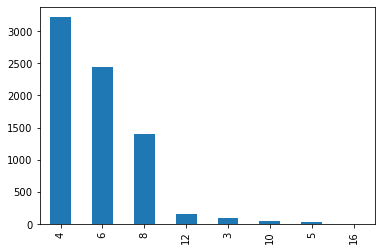

In [6]:
for feature in discrete_features:
    data = df.copy()
    
    print(data.groupby(feature)['CO2 Emissions(g/km)'].count() / len(data))
    print(data[feature].value_counts())
    data[feature].value_counts().plot.bar()
    plt.show()

Cylinders
3     0.008978
4     0.356458
5     0.003311
6     0.348213
8     0.242903
10    0.008200
12    0.031091
16    0.000846
Name: CO2 Emissions(g/km), dtype: float64


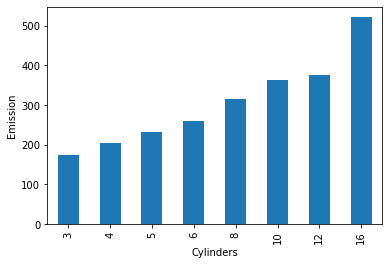

In [7]:
for feature in discrete_features:
    data = df.copy()
    
    print(data.groupby(feature)['CO2 Emissions(g/km)'].sum() / data['CO2 Emissions(g/km)'].sum())
    data.groupby(feature)['CO2 Emissions(g/km)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Emission')
    plt.show()

##### Observation:
1. Majority of the cars have 4 cylinders(43%), followed by 6 cylinders(33%) and 8 cylinders(18%)
2. These cars account for 94.7% of total CO2 Emissions
3. Emission increases as number of cylinders increase

### Continuous Features

In [8]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(continuous_features)

['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


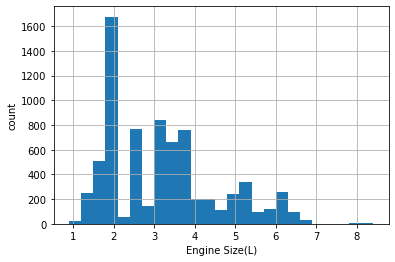

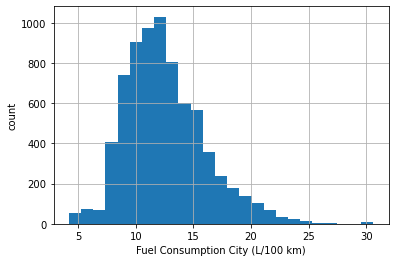

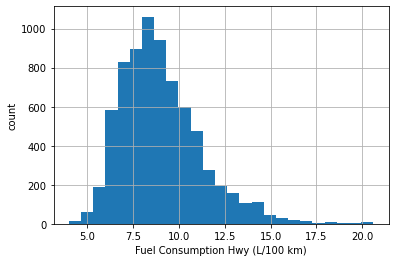

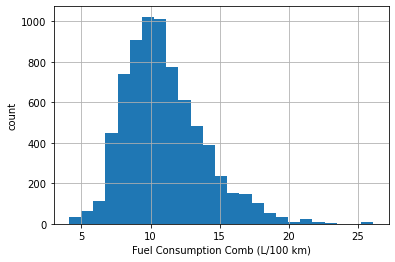

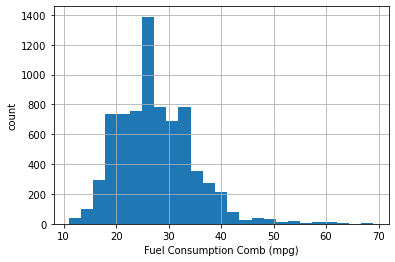

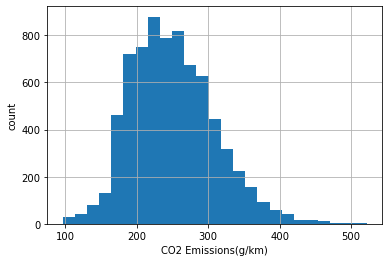

In [9]:
for feature in continuous_features:
    data = df.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

Features are slightly right skewed. Log transformation could be applied

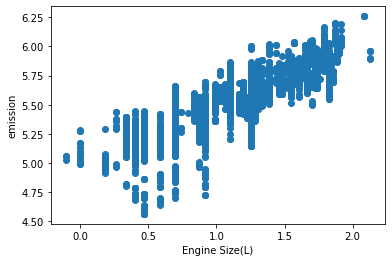

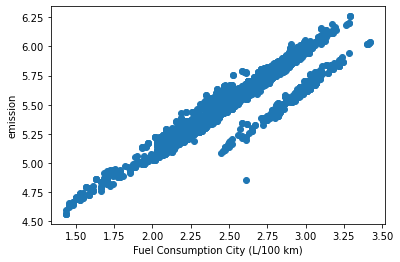

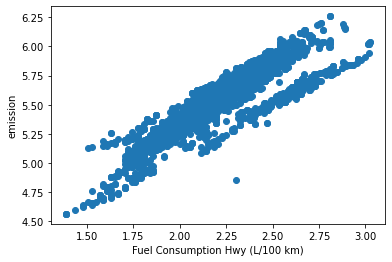

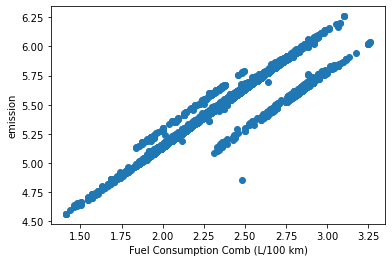

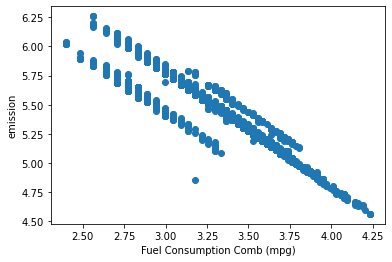

In [10]:
## Log transformation

for feature in continuous_features:
    if feature != 'CO2 Emissions(g/km)':
        data = df.copy()
        
        data[feature] = np.log(data[feature])
        
        plt.scatter(data[feature], np.log(data['CO2 Emissions(g/km)']))
        plt.xlabel(feature)
        plt.ylabel('emission')
        plt.show()

##### Observation:
1. Emission increases with increase in engine size
2. Emission increases with increase in Fuel Consumption (City, Hwy, Comb (L/100km))
3. Emission decreases with increase in Fuel Consumption Comb (mpg)

### Continuous Outliers

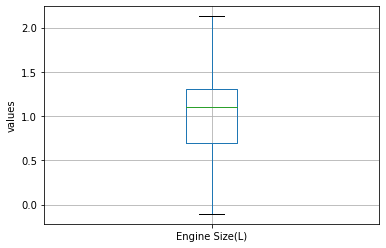

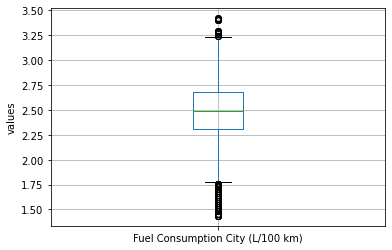

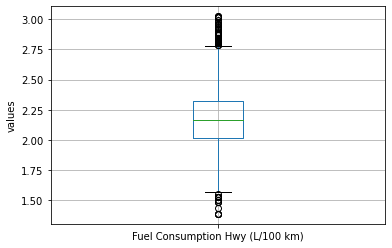

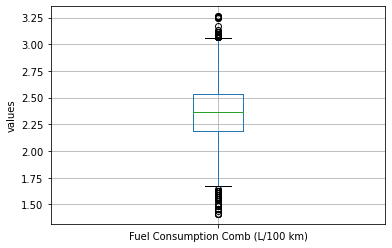

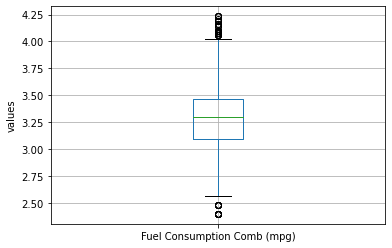

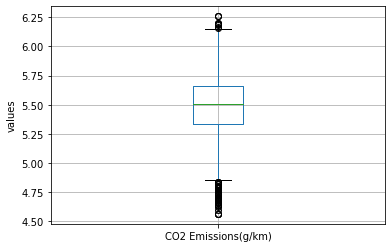

In [11]:
for feature in continuous_features:
    data = df.copy()
    
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel('values')
    plt.show()

## Categorical Features

In [12]:
cat_features = [feature for feature in df.columns if feature not in num_features]
df[cat_features].head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


In [13]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(df[feature].unique())))

Make: 42 categories
Model: 2053 categories
Vehicle Class: 16 categories
Transmission: 27 categories
Fuel Type: 5 categories


We can drop 'model' feature as 'make' will provide an overview on the specifications 

In [14]:
cat_features.remove('Model')

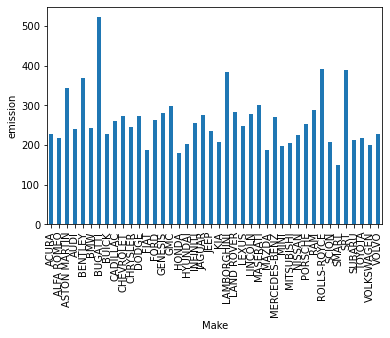

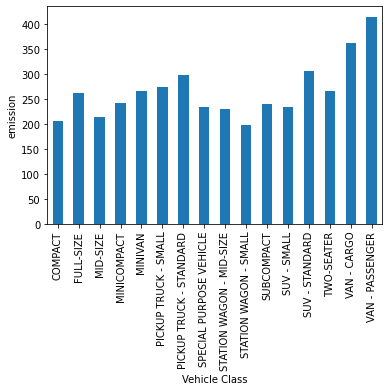

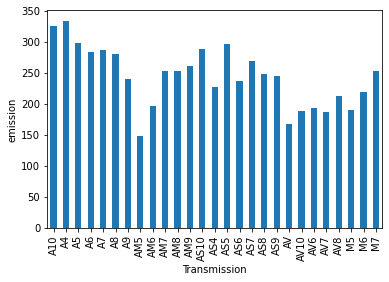

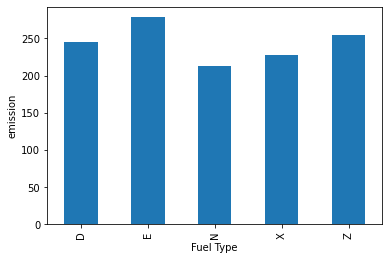

In [15]:
## relationship with emission

for feature in cat_features:
    data = df.copy()
    
    data.groupby(feature)['CO2 Emissions(g/km)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('emission')
    plt.show()

##### Observations:
1. Bugatti has the highest emission
2. Vans (Cargo and Passenger) have the highest emission
3. AM5 engines have relatively lowest emission
4. E > Z > D > X > N fuel type emission rate

# Feature Engineering

In [16]:
dataset = df.copy()
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Transformation of Continuous Values

In [17]:
for feature in continuous_features:
    dataset[feature] = np.log(dataset[feature])
    
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,0.693147,4,AS5,Z,2.292535,1.902108,2.140066,3.496508,5.278115
1,ACURA,ILX,COMPACT,0.875469,4,M6,Z,2.415914,2.041220,2.261763,3.367296,5.398163
2,ACURA,ILX HYBRID,COMPACT,0.405465,4,AV7,Z,1.791759,1.757858,1.774952,3.871201,4.912655
3,ACURA,MDX 4WD,SUV - SMALL,1.252763,6,AS6,Z,2.541602,2.208274,2.406945,3.218876,5.541264
4,ACURA,RDX AWD,SUV - SMALL,1.252763,6,AS6,Z,2.493205,2.163323,2.360854,3.295837,5.497168


## Handling rare Categorical Features

We cannot classify 'Make' or 'Transmission' as there are more categories in it and they have a relationship with Emission. There are not enough rare variables in the other categories that the need to declare them explicitly should arise

### Converting Categorical features to Numerical features

Since each categorical feature has a strong relationship with Emission we should use ordinal encoding

We will not convert 'Model' as we are dropping the feature later

In [18]:
for feature in cat_features:
    ordinal_labels = dataset.groupby(feature)['CO2 Emissions(g/km)'].max().sort_values().index
    ordinal_dict = {k:i for i, k in enumerate(ordinal_labels, 0)}
    dataset[feature] = data[feature].map(ordinal_dict)

In [19]:
dataset.drop(['Model'], axis = 1, inplace = True)
dataset.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4,9,0.693147,4,11,4,2.292535,1.902108,2.140066,3.496508,5.278115
1,4,9,0.875469,4,16,4,2.415914,2.041220,2.261763,3.367296,5.398163
2,4,9,0.405465,4,4,4,1.791759,1.757858,1.774952,3.871201,4.912655
3,4,3,1.252763,6,18,4,2.541602,2.208274,2.406945,3.218876,5.541264
4,4,3,1.252763,6,18,4,2.493205,2.163323,2.360854,3.295837,5.497168


In [20]:
dataset.to_csv('processed_data.csv', index = False)

# Feature Selection

In [21]:
df = pd.read_csv('processed_data.csv')
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4,9,0.693147,4,11,4,2.292535,1.902108,2.140066,3.496508,5.278115
1,4,9,0.875469,4,16,4,2.415914,2.041220,2.261763,3.367296,5.398163
2,4,9,0.405465,4,4,4,1.791759,1.757858,1.774952,3.871201,4.912655
3,4,3,1.252763,6,18,4,2.541602,2.208274,2.406945,3.218876,5.541264
4,4,3,1.252763,6,18,4,2.493205,2.163323,2.360854,3.295837,5.497168


In [22]:
X = df.drop('CO2 Emissions(g/km)', axis = 1)

In [23]:
y = df.iloc[:, -1]

## Dropping with correlation

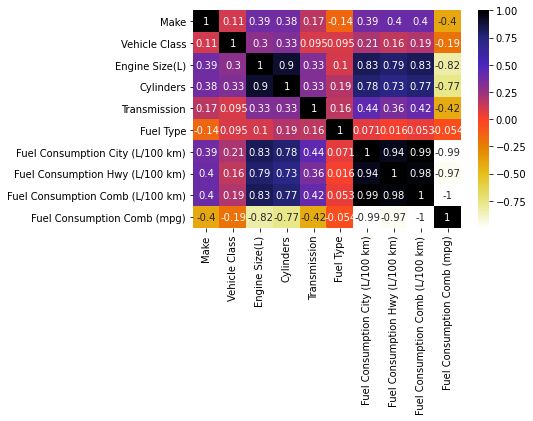

In [24]:
cor = X.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

We can drop columns with correlation > 0.85

In [25]:
X = X.drop(['Cylinders', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'], axis = 1)

## Feature Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
linear_regressor.score(X_test_scaled, y_test)

0.9243327756258755

In [32]:
linear_regressor.coef_

array([ 0.01629546, -0.03213343,  0.21480123,  0.02752826,  0.13005895,
        0.45813066, -0.87411662])

## Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_regressor, X_train_scaled, y_train, cv=5)
print(np.mean(scores))

0.9181793524702078


## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_regressor = Ridge(alpha = 1)
ridge_regressor.fit(X_train_scaled, y_train)
ridge_regressor.score(X_test_scaled, y_test)

0.9242409372995457

In [36]:
ridge_regressor.coef_

array([ 0.01760384, -0.03304994,  0.22269241,  0.02765407,  0.12825244,
        0.56069698, -0.75637732])

## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso_regr = Lasso(alpha = 0.005)
lasso_regr.fit(X_train_scaled, y_train)

Lasso(alpha=0.005)

In [39]:
lasso_regr.score(X_test_scaled, y_test)

0.8934101361212246

In [40]:
lasso_regr.coef_

array([ 0.        , -0.        ,  0.26521166,  0.        ,  0.        ,
        0.46930491, -0.57881044])

## Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
regressor.score(X_test, y_test)

0.9946855537520184

# Inferences

In [45]:
summary = pd.DataFrame(X.columns, columns = ['Feature'])
summary['Weights'] = lasso_regr.coef_
summary.sort_values(by = ['Weights'], ascending = False, inplace = True)
summary

,Feature,Weights
5,Fuel Consumption City (L/100 km),0.469305
2,Engine Size(L),0.265212
0,Make,0.000000
1,Vehicle Class,-0.000000
3,Transmission,0.000000
4,Fuel Type,0.000000
6,Fuel Consumption Comb (mpg),-0.578810


From above summary table we can summarize:
1. CO2 Emission(g/km) is dependent on Engine Size(L), Fuel Consumption City(L/100km), Fuel Consumption Comb(mpg)
2. Features like Make, Vehicle Class, Transmission, Fuel Type do not provide significant value towards the prediction of CO2 Emission(g/km)
3. CO2 Emission(g/km) increases with the increase in Engine Size(L)
4. CO2 Emission(g/km) increases with the increase in Fuel Consumption City(L/100km)
5. CO2 Emission(g/km) decreases with the increase in Fuel Consumption Comb(mpg)

Fuel Consumption Comb(mpg) has the most influence on Emission(-ve correlation), followed by Fuel Consumption City(L/100km)(+ve correlation) and lastly Engine Size(L)(+ve correlation)

Since Fuel Consumption City and Fuel Consumption Hwy are highly correlated, considering them individually or combined will not affect the model greatly as we can use just one of the two for a combined representation